# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [38]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '/home/osboxes/Documents/data_set'

### 之前做過的處理

In [39]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [40]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [42]:
age = app_train['DAYS_BIRTH']/365
print(app_train['DAYS_BIRTH']/365)

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64


In [43]:
Future_df = pd.DataFrame({"age" : age})
print(Future_df)
print(type(Future_df))
print(Future_df["age"])

              age
0       25.920548
1       45.931507
2       52.180822
3       52.068493
4       54.608219
...           ...
307506  25.553425
307507  56.917808
307508  41.002740
307509  32.769863
307510  46.180822

[307511 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: age, Length: 307511, dtype: float64


In [66]:
Future_df["age_group"] = pd.qcut(Future_df["age"], 10)
print(Future_df["age_group"])

0         (20.517, 28.175]
1         (43.151, 47.178]
2          (51.74, 56.093]
3          (51.74, 56.093]
4          (51.74, 56.093]
                ...       
307506    (20.517, 28.175]
307507     (56.093, 60.77]
307508    (39.496, 43.151]
307509      (32.038, 36.0]
307510    (43.151, 47.178]
Name: age_group, Length: 307511, dtype: category
Categories (10, interval[float64]): [(20.517, 28.175] < (28.175, 32.038] < (32.038, 36.0] < (36.0, 39.496] ... (47.178, 51.74] < (51.74, 56.093] < (56.093, 60.77] < (60.77, 69.121]]


In [67]:
print(Future_df["age_group"].value_counts())

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: age_group, dtype: int64


In [68]:
print(len(Future_df["age_group"]), type(Future_df.loc[1, "age_group"]))
print(len(app_train["TARGET"]), type(app_train.loc[1, "TARGET"]))

307511 <class 'pandas._libs.interval.Interval'>
307511 <class 'numpy.int64'>


In [69]:
Future_df["TARGET"] = app_train["TARGET"]
print(Future_df)

              age         age_group  TARGET
0       25.920548  (20.517, 28.175]       1
1       45.931507  (43.151, 47.178]       0
2       52.180822   (51.74, 56.093]       0
3       52.068493   (51.74, 56.093]       0
4       54.608219   (51.74, 56.093]       0
...           ...               ...     ...
307506  25.553425  (20.517, 28.175]       0
307507  56.917808   (56.093, 60.77]       0
307508  41.002740  (39.496, 43.151]       0
307509  32.769863    (32.038, 36.0]       1
307510  46.180822  (43.151, 47.178]       0

[307511 rows x 3 columns]


In [70]:
age_target = Future_df.groupby("age_group").mean()
print(age_target)

                        age    TARGET
age_group                            
(20.517, 28.175]  25.481912  0.115700
(28.175, 32.038]  30.133099  0.109948
(32.038, 36.0]    34.014841  0.098065
(36.0, 39.496]    37.768850  0.088527
(39.496, 43.151]  41.301922  0.079037
(43.151, 47.178]  45.103335  0.077948
(47.178, 51.74]   49.430919  0.071357
(51.74, 56.093]   53.919070  0.063431
(56.093, 60.77]   58.401732  0.054232
(60.77, 69.121]   63.823877  0.049027


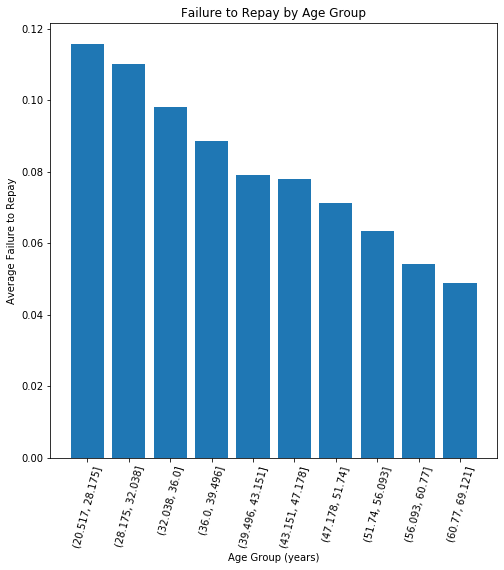

In [71]:
plt.figure(figsize = (8, 8))
plt.bar(range(len(age_target.index)), age_target["TARGET"], )
plt.xticks(range(len(age_target.index)), age_target.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');
plt.show()